## [2024년 1학기 로봇공학] Ch. 4-a. 2D Forward Kinematics

- 작성자 : 서울시립대학교 전자전기컴퓨터공학부 박경훈 교수(gyunghoon.park@uos.ac.kr)
- 작성일 : 2024. 3. 26.

In [2]:
import spatialmath as sm
import roboticstoolbox as rtb
import numpy as np
from spatialmath.base import *
from math import *
from scipy import *

### Elementary Transformations

In [3]:
a1 = 1
e = rtb.ET2.R() * rtb.ET2.tx(a1)
print(e)

R(q) ⊕ tx(1)


In [4]:
print(e.fkine(pi/6))

   0.866    -0.5       0.866     
   0.5       0.866     0.5       
   0         0         1         



In [5]:
sm.SE2.Rot(pi/6) * sm.SE2.Tx(a1)

   0.866    -0.5       0.866     
   0.5       0.866     0.5       
   0         0         1         


### FK via Elementary Transformations

In [6]:
a1 = 1
a2 = 1
e = rtb.ET2.R() * rtb.ET2.tx(a1) * rtb.ET2.R() * rtb.ET2.tx(a2)

In [7]:
e.fkine((pi/6, pi/3))

   0        -1         0.866     
   1         0         1.5       
   0         0         1         


In [8]:
print("Length of e :",e.n)
print("Joint of e :",e.joints())
print("Structure of e :",e.structure)

Length of e : 2
Joint of e : [ET2.R(jindex=0), ET2.R(jindex=1)]
Structure of e : RR


### Chain of Robot Links

In [9]:
a1 = 1; a2 = 1

In [10]:
link1 = rtb.Link2(rtb.ET2.R(), name="link1")
link2 = rtb.Link2(rtb.ET2.tx(a1) * rtb.ET2.R(), name="link2", parent=link1)
link3 = rtb.Link2(rtb.ET2.tx(a2), name="link3", parent=link2)

In [11]:
robot = rtb.ERobot2([link1, link2, link3], name = "myRobot")
print(robot)

ERobot: myRobot, 2 joints (RR)
┌─────┬────────┬───────┬────────┬─────────────────────┐
│link │  link  │ joint │ parent │ ETS: parent to link │
├─────┼────────┼───────┼────────┼─────────────────────┤
│   0 │ link1  │     0 │ BASE   │ R(q0)               │
│   1 │ link2  │     1 │ link1  │ tx(1) ⊕ R(q1)       │
│   2 │ @link3 │       │ link2  │ tx(1)               │
└─────┴────────┴───────┴────────┴─────────────────────┘



In [12]:
robot.fkine([pi/6,pi/3])

   0        -1         0.866     
   1         0         1.5       
   0         0         1         


In [13]:
print(robot[1])

Link2("link2", tx(1) ⊕ R(q), parent="link1")


In [14]:
print(robot["link2"])

Link2("link2", tx(1) ⊕ R(q), parent="link1")


In [15]:
print(link2.parent)

Link2("link1", R(q))


In [16]:
print(link2.children)

[Link2([ET2.tx(eta=1.0)], name = "link3", parent="link2")]


### FK via Screw

In [107]:
S2 = sm.Twist2.UnitRevolute([0,-a1])
S1 = sm.Twist2.UnitRevolute([0,0])

In [108]:
M = transl2(a1+a2,0)

In [109]:
print(S1.exp(pi/6) * S2.exp(pi/3))

   0        -1        -0.5       
   1         0        -0.866     
   0         0         1         



<Axes: xlabel='X', ylabel='Y'>

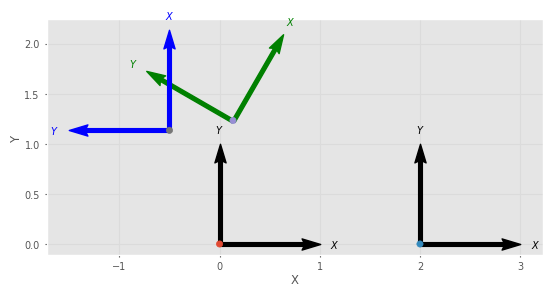

In [110]:
trplot2(transl2([0,0]), color = "black")
trplot2(M, color = "black")
trplot2(S2.SE2(pi/3) * M, color = "green")
trplot2(T)